## Data Exploration 

In [66]:
import findspark
findspark.init('/home/ubuntu/spark-2.3.2-bin-hadoop2.7/')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722_iterations').getOrCreate()

In [67]:
# Importing data which has a header and automatically configuring the schema.
df = spark.read.csv('/home/ubuntu/iteration-4/Datasets/Absenteeism_at_work_Project.csv', header=True, inferSchema=True)

# Let's visually inspect the data, we notice some nulls which means missing values. 
df.show(10)

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                        

In [68]:
import pandas as pd
df_pd = pd.read_csv('/home/ubuntu/iteration-4/Datasets/Absenteeism_at_work_Project.csv')

# Read csv use pandas. total 21 columns
df_pd.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [69]:
# Tidy view of dataframe.
pd.DataFrame(df.take(5),columns=df.columns).transpose()

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,7,7,7,7,7
Day of the week,3,3,4,5,5
Seasons,1,1,1,1,1
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239554,239554,239554,239554,239554


In [70]:
# Let's see how many rows of data we originally have. 740 data points. 
print("Total data points:", df.count())

# Let's see data set schema.
# Work load Average/day is string and the name with an extra space, others are integer.
df.printSchema()

Total data points: 740
root
 |-- ID: integer (nullable = true)
 |-- Reason for absence: integer (nullable = true)
 |-- Month of absence: integer (nullable = true)
 |-- Day of the week: integer (nullable = true)
 |-- Seasons: integer (nullable = true)
 |-- Transportation expense: integer (nullable = true)
 |-- Distance from Residence to Work: integer (nullable = true)
 |-- Service time: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work load Average/day : integer (nullable = true)
 |-- Hit target: integer (nullable = true)
 |-- Disciplinary failure: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Son: integer (nullable = true)
 |-- Social drinker: integer (nullable = true)
 |-- Social smoker: integer (nullable = true)
 |-- Pet: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Body mass index: integer (nullable = true)
 |-- Absenteeism time in hours: integer (nullable = true)



In [71]:
# Fix extra space in column "Work load Average/day "
df = df.withColumnRenamed("Work load Average/day ","Work load Average/day")

# Check no extra space in column "Work load Average/day"
df.select("Work load Average/day").printSchema()

root
 |-- Work load Average/day: integer (nullable = true)



## Data Quality

In [72]:
from pyspark.sql.functions import isnull,isnan,when,count,col,pow

# Let's see how many missing values for each variable. Only 3 columns no missing values. 
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+---------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day|Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+---------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|  0|                 3|               1|              0|      0|                     7|                           

In [73]:
# Let's check the statistics, some columns min values are 0.
# No missing value columns are ID, Day of the week and Seasons. 
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,740,18.017567567567568,11.021247263063657,1,36
Reason for absence,737,19.188602442333785,8.437492694080222,0,28
Month of absence,739,6.319350473612991,3.4359476368113757,0,12
Day of the week,740,3.9148648648648647,1.4216747097562805,2,6
Seasons,740,2.5445945945945945,1.111831060157382,1,4
Transportation expense,733,221.0354706684857,66.95417931758263,118,388
Distance from Residence to Work,737,29.667571234735412,14.848124010131997,5,52
Service time,737,12.565807327001357,4.389813174543068,1,29
Age,737,36.44911804613297,6.480147560082895,27,58


## Data Cleaning 

In [74]:
# Replace Nulls with 0 in columns Disciplinary failure, Son and Pet
df = df.na.fill({'Disciplinary failure':0,'Son':0,'Pet':0})

# Check these three columns, 740 data points.
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,740,18.017567567567568,11.021247263063657,1,36
Reason for absence,737,19.188602442333785,8.437492694080222,0,28
Month of absence,739,6.319350473612991,3.4359476368113757,0,12
Day of the week,740,3.9148648648648647,1.4216747097562805,2,6
Seasons,740,2.5445945945945945,1.111831060157382,1,4
Transportation expense,733,221.0354706684857,66.95417931758263,118,388
Distance from Residence to Work,737,29.667571234735412,14.848124010131997,5,52
Service time,737,12.565807327001357,4.389813174543068,1,29
Age,737,36.44911804613297,6.480147560082895,27,58


In [75]:
from pyspark.sql.types import IntegerType

# Replace Nulls with formula caldulation in column Body mass index
# Value of formula caldulationIt comes from columns Weight and Height
new_column_BMI = when(col("Body mass index").isNull(), (col("Weight")/((col("Height")/100)*(col("Height")/100)))).otherwise(col("Body mass index"))
df = df.withColumn("Body mass index", new_column_BMI.cast(IntegerType()))

# Check Body mass index column, 738 data points.
# 2 rows still with nulls because either Weight or Height has null value
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,740,18.017567567567568,11.021247263063657,1,36
Reason for absence,737,19.188602442333785,8.437492694080222,0,28
Month of absence,739,6.319350473612991,3.4359476368113757,0,12
Day of the week,740,3.9148648648648647,1.4216747097562805,2,6
Seasons,740,2.5445945945945945,1.111831060157382,1,4
Transportation expense,733,221.0354706684857,66.95417931758263,118,388
Distance from Residence to Work,737,29.667571234735412,14.848124010131997,5,52
Service time,737,12.565807327001357,4.389813174543068,1,29
Age,737,36.44911804613297,6.480147560082895,27,58


In [76]:
# Removing Rows with Nulls in all columns
df = df.na.drop()

# Check if any null in data frame, all 0 vaules mean no null
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+---------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day|Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+---------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|  0|                 0|               0|              0|      0|                     0|                           

In [77]:
# Check statistics for all columns. 
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,669,17.8609865470852,11.04184147219675,1,36
Reason for absence,669,19.255605381165918,8.41399706005876,0,28
Month of absence,669,6.191330343796712,3.3698002117420733,0,12
Day of the week,669,3.8878923766816142,1.4208624817316762,2,6
Seasons,669,2.5201793721973096,1.093651781544042,1,4
Transportation expense,669,220.64275037369208,65.32898799662858,118,388
Distance from Residence to Work,669,29.542600896860986,14.690216094865033,5,52
Service time,669,12.672645739910314,4.335363119601739,1,29
Age,669,36.58893871449925,6.554922060048033,27,58


In [78]:
#  Let's drop row with 0 in columns Reason for absence, Month of absence because 0 is meaningless.
df = df.filter((df[1]>0) & (df[2]>0)).drop()

# Check no 0 for these columns.
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,634,17.869085173501578,11.035926829873137,1,36
Reason for absence,634,20.318611987381704,7.285385442127384,1,28
Month of absence,634,6.140378548895899,3.363334102668687,1,12
Day of the week,634,3.889589905362776,1.4277055983201008,2,6
Seasons,634,2.4873817034700316,1.087338485493077,1,4
Transportation expense,634,218.83596214511041,64.19060947281505,118,388
Distance from Residence to Work,634,29.697160883280755,14.720344911989867,5,52
Service time,634,12.67981072555205,4.383655117776344,1,29
Age,634,36.43375394321767,6.47363319951939,27,58


In [79]:
# Let's how many rows and columns.
print("Total data points:", df.count())
print("Total data columns:", len(df.columns))

Total data points: 634
Total data columns: 21


In [80]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Reason for absence: integer (nullable = true)
 |-- Month of absence: integer (nullable = true)
 |-- Day of the week: integer (nullable = true)
 |-- Seasons: integer (nullable = true)
 |-- Transportation expense: integer (nullable = true)
 |-- Distance from Residence to Work: integer (nullable = true)
 |-- Service time: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work load Average/day: integer (nullable = true)
 |-- Hit target: integer (nullable = true)
 |-- Disciplinary failure: integer (nullable = false)
 |-- Education: integer (nullable = true)
 |-- Son: integer (nullable = false)
 |-- Social drinker: integer (nullable = true)
 |-- Social smoker: integer (nullable = true)
 |-- Pet: integer (nullable = false)
 |-- Weight: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Body mass index: integer (nullable = true)
 |-- Absenteeism time in hours: integer (nullable = true)



## Data Transformation 

In [81]:
# Body mass index is calculated from Weight and Height, drop Weight and Height because of multicollinearity.
# From statistics, found most values for Disciplinary failure and Social smoker are 0, decide to drop them. 
# Hit target has high value for all items, decide to drop it. 
drop_list = ['Weight', 'Height', 'Disciplinary failure', 'Social smoker', 'Hit target']
df = df.select([column for column in df.columns if column not in drop_list])

# Check these columns are removed. 
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Reason for absence: integer (nullable = true)
 |-- Month of absence: integer (nullable = true)
 |-- Day of the week: integer (nullable = true)
 |-- Seasons: integer (nullable = true)
 |-- Transportation expense: integer (nullable = true)
 |-- Distance from Residence to Work: integer (nullable = true)
 |-- Service time: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work load Average/day: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Son: integer (nullable = false)
 |-- Social drinker: integer (nullable = true)
 |-- Pet: integer (nullable = false)
 |-- Body mass index: integer (nullable = true)
 |-- Absenteeism time in hours: integer (nullable = true)



In [82]:
# Check statistics for columns. 
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,634,17.869085173501578,11.035926829873137,1,36
Reason for absence,634,20.318611987381704,7.285385442127384,1,28
Month of absence,634,6.140378548895899,3.363334102668687,1,12
Day of the week,634,3.889589905362776,1.4277055983201008,2,6
Seasons,634,2.4873817034700316,1.087338485493077,1,4
Transportation expense,634,218.83596214511041,64.19060947281505,118,388
Distance from Residence to Work,634,29.697160883280755,14.720344911989867,5,52
Service time,634,12.67981072555205,4.383655117776344,1,29
Age,634,36.43375394321767,6.47363319951939,27,58


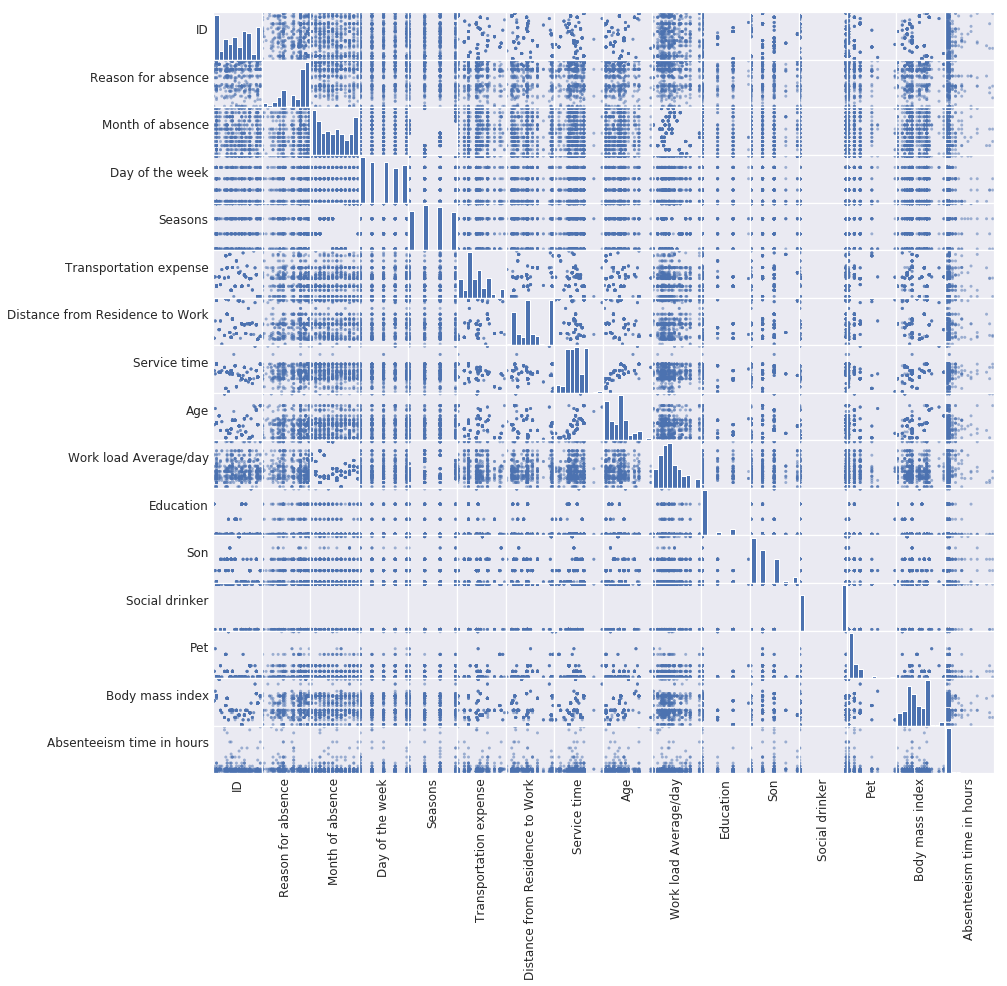

In [83]:
# Let's look at correlations between variables. Clearly some varialbles are categorical values. 
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(14, 14));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [84]:
# import libs for visulaization.
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# convert dataframe to pandas dataframe for visulization.
pandas_df = df.toPandas()
pandas_df.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Pet,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,1,2,1,1,30,4
1,3,23,7,4,1,179,51,18,38,239554,1,0,1,0,31,2


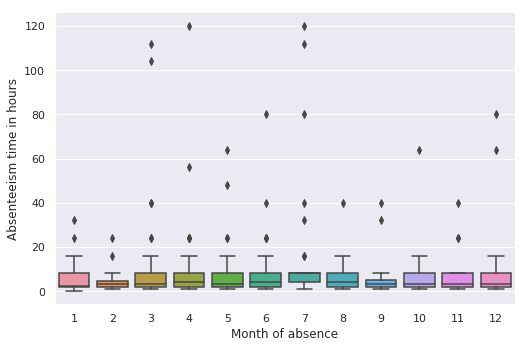

In [86]:
# Absence distribution per month.
sns.catplot(x='Month of absence',y='Absenteeism time in hours',kind='box',aspect=1.5,data=pandas_df)

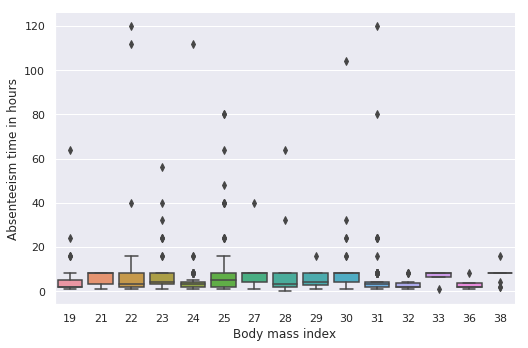

In [87]:
# Absence distribution per BMI.
sns.catplot(x='Body mass index',y='Absenteeism time in hours',kind='box',aspect=1.5,data=pandas_df)

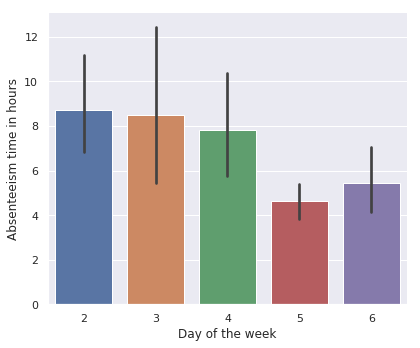

In [88]:
# Absence distribution per working day.
sns.catplot(x='Day of the week',y='Absenteeism time in hours',kind='bar',aspect=1.2,data=pandas_df)

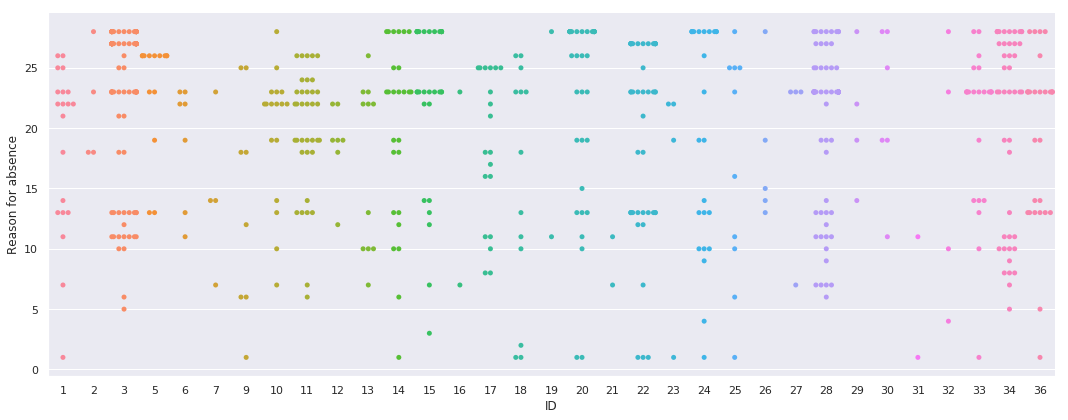

In [89]:
# Absence reason distribution per ID.
sns.catplot(x='ID',y='Reason for absence',kind='swarm',height=6,aspect=2.5,data=pandas_df)

## Data Exploration

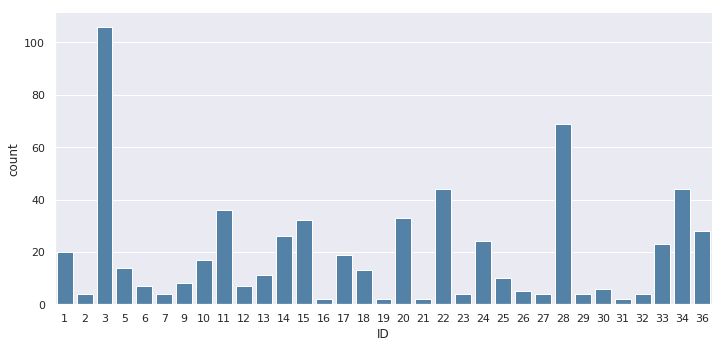

In [90]:
# ID counts. 
sns.catplot(x="ID", kind="count", aspect=2, data=pandas_df, color='steelblue');

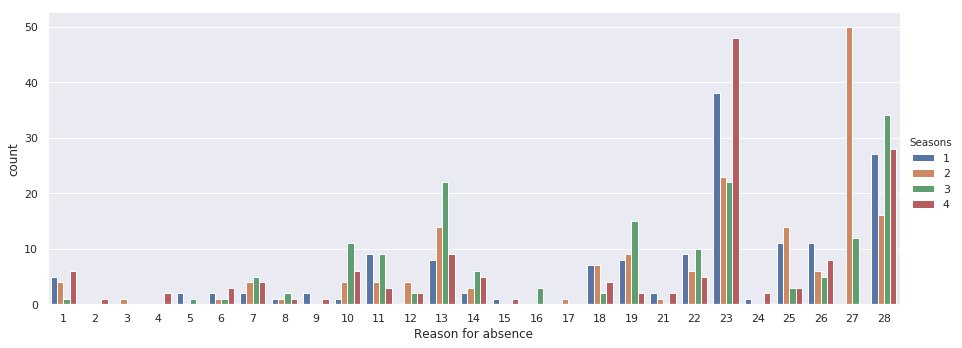

In [91]:
# Reason for absence counts per Seasons. 
sns.catplot(x="Reason for absence", hue="Seasons", kind="count", aspect=2.5, data=pandas_df);

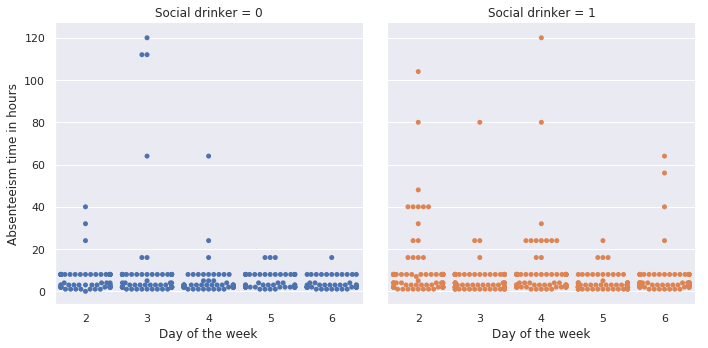

In [92]:
# Absence time per working day compared between drinker or not drinker. 
sns.catplot(x="Day of the week", y="Absenteeism time in hours", hue="Social drinker",
            col="Social drinker", aspect=1,
            kind="swarm", data=pandas_df);

In [93]:
# Select relevant features. Excluded ID, Seasons
df_clean = df.select("Month of absence", "Day of the week",'Reason for absence','Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day', 'Education', 'Son', 'Social drinker', 'Pet','Body mass index','Absenteeism time in hours')
cols = df_clean.columns
df_clean.printSchema()

root
 |-- Month of absence: integer (nullable = true)
 |-- Day of the week: integer (nullable = true)
 |-- Reason for absence: integer (nullable = true)
 |-- Transportation expense: integer (nullable = true)
 |-- Distance from Residence to Work: integer (nullable = true)
 |-- Service time: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work load Average/day: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Son: integer (nullable = false)
 |-- Social drinker: integer (nullable = true)
 |-- Pet: integer (nullable = false)
 |-- Body mass index: integer (nullable = true)
 |-- Absenteeism time in hours: integer (nullable = true)



## Setting Up DataFrame - 1

In [94]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

In [95]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['Month of absence','Day of the week','Reason for absence', 
                                                'Transportation expense', 'Distance from Residence to Work', 
                                                'Service time', 'Age', 'Work load Average/day', 'Education', 
                                                'Son', 'Social drinker', 'Pet','Body mass index'], 
                                   outputCol = 'features')

In [96]:
# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(df_clean)

# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- Month of absence: integer (nullable = true)
 |-- Day of the week: integer (nullable = true)
 |-- Reason for absence: integer (nullable = true)
 |-- Transportation expense: integer (nullable = true)
 |-- Distance from Residence to Work: integer (nullable = true)
 |-- Service time: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work load Average/day: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Son: integer (nullable = false)
 |-- Social drinker: integer (nullable = true)
 |-- Pet: integer (nullable = false)
 |-- Body mass index: integer (nullable = true)
 |-- Absenteeism time in hours: integer (nullable = true)
 |-- features: vector (nullable = true)



[Row(Month of absence=7, Day of the week=3, Reason for absence=26, Transportation expense=289, Distance from Residence to Work=36, Service time=13, Age=33, Work load Average/day=239554, Education=1, Son=2, Social drinker=1, Pet=1, Body mass index=30, Absenteeism time in hours=4, features=DenseVector([7.0, 3.0, 26.0, 289.0, 36.0, 13.0, 33.0, 239554.0, 1.0, 2.0, 1.0, 1.0, 30.0]))]

In [97]:
# Because the features have been combined into one vector, we no longer need them. Below we select the features and label.
vector_output = vector_output.select(['features', 'Absenteeism time in hours'])

# the dataframe now only contains two columns. 
print(vector_output.head(1))
vector_output.show(5)

[Row(features=DenseVector([7.0, 3.0, 26.0, 289.0, 36.0, 13.0, 33.0, 239554.0, 1.0, 2.0, 1.0, 1.0, 30.0]), Absenteeism time in hours=4)]
+--------------------+-------------------------+
|            features|Absenteeism time in hours|
+--------------------+-------------------------+
|[7.0,3.0,26.0,289...|                        4|
|[7.0,4.0,23.0,179...|                        2|
|[7.0,5.0,7.0,279....|                        4|
|[7.0,5.0,23.0,289...|                        2|
|[7.0,6.0,23.0,260...|                        4|
+--------------------+-------------------------+
only showing top 5 rows



In [98]:
# Let's do a randomised 80/20 split. Remember, you should explain why you chose a particular split. 
train_data,test_data = vector_output.randomSplit([0.8,0.2], seed = 201810)

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-------------------------+
|summary|Absenteeism time in hours|
+-------+-------------------------+
|  count|                      513|
|   mean|        7.257309941520468|
| stddev|       13.056969155615782|
|    min|                        0|
|    max|                      120|
+-------+-------------------------+

+-------+-------------------------+
|summary|Absenteeism time in hours|
+-------+-------------------------+
|  count|                      121|
|   mean|        6.776859504132231|
| stddev|       14.032989467267118|
|    min|                        1|
|    max|                      112|
+-------+-------------------------+



## Linear Regression

In [99]:
# Importing the LR package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
lr = LinearRegression(featuresCol='features', labelCol='Absenteeism time in hours')

# Fit the training data.
lr_model = lr.fit(train_data)

# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary

# Print RMSE. 
print("RMSE: " + str(training_summary.rootMeanSquaredError))

# Print R2.
print("R2: " + str(training_summary.r2))

Coefficients: [-0.13236211178560536,-0.9276083685092196,-0.5292863402891661,0.002566792457652132,-0.05364904987629232,-0.07085712015404699,0.10535753506259153,-4.062449673205312e-06,-0.71947433333991,0.7086016472382726,3.2118365052396745,-0.27744969667152064,-0.18451854023070965]
Intercept: 25.124355415607134

RMSE: 12.155882096133816
R2: 0.13156842406486158


In [100]:
train_data.describe().show()

+-------+-------------------------+
|summary|Absenteeism time in hours|
+-------+-------------------------+
|  count|                      513|
|   mean|        7.257309941520468|
| stddev|       13.056969155615782|
|    min|                        0|
|    max|                      120|
+-------+-------------------------+



In [101]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("prediction","Absenteeism time in hours","features").show(5)

+------------------+-------------------------+--------------------+
|        prediction|Absenteeism time in hours|            features|
+------------------+-------------------------+--------------------+
| 9.113257041650868|                        4|[1.0,2.0,26.0,118...|
|10.891023423646782|                        8|[1.0,3.0,18.0,289...|
|12.589782317647435|                        8|[1.0,4.0,13.0,289...|
| 8.652124666090266|                       16|[1.0,5.0,12.0,179...|
|15.626451475760682|                        8|[2.0,2.0,11.0,388...|
+------------------+-------------------------+--------------------+
only showing top 5 rows



In [102]:
from pyspark.ml.evaluation import RegressionEvaluator

# Let's evaluate the model against the test data.
lr_evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="Absenteeism time in hours",metricName="r2")
test_results = lr_model.evaluate(test_data)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("RMSE on test data for Linear Regression: " + str(test_results.rootMeanSquaredError))
print('R2 on test data for Linear Regression:' + str(test_results.r2))

RMSE on test data for Linear Regression: 13.206685785066249
R2 on test data for Linear Regression:0.10691783576594449


## Decision Tree Regression

In [103]:
from pyspark.ml.regression import DecisionTreeRegressor

dtr = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Absenteeism time in hours')
dtr_model = dtr.fit(train_data)

In [104]:
dtr_predictions = dtr_model.transform(test_data)

dtr_evaluator = RegressionEvaluator(labelCol="Absenteeism time in hours", predictionCol="prediction", metricName="rmse")
rmse = dtr_evaluator.evaluate(dtr_predictions)
print("RMSE on test data for Decision Tree Regression = %g" % rmse)

dtr_evaluator = RegressionEvaluator(labelCol="Absenteeism time in hours", predictionCol="prediction", metricName="r2")
print("R2 on test data for Decision Tree Regression = %g" % dtr_evaluator.evaluate(dtr_predictions))

RMSE on test data for Decision Tree Regression = 9.88739
R2 on test data for Decision Tree Regression = 0.499427


### Feature Importance

In [105]:
# Check feature importance.
train_data.take(1)

[Row(features=DenseVector([1.0, 2.0, 12.0, 179.0, 26.0, 9.0, 30.0, 313532.0, 3.0, 0.0, 0.0, 0.0, 19.0]), Absenteeism time in hours=24)]

In [106]:
dtr_model.featureImportances

SparseVector(13, {0: 0.0025, 1: 0.0261, 2: 0.4232, 3: 0.1015, 4: 0.0018, 5: 0.0407, 6: 0.1855, 7: 0.2001, 9: 0.0157, 12: 0.0029})

In [107]:
vector_output.take(1)

[Row(features=DenseVector([7.0, 3.0, 26.0, 289.0, 36.0, 13.0, 33.0, 239554.0, 1.0, 2.0, 1.0, 1.0, 30.0]), Absenteeism time in hours=4)]

Reason for absence is the most important feature to predict the Absenteeism time in hours. Next important feature is Work load Average/day. 

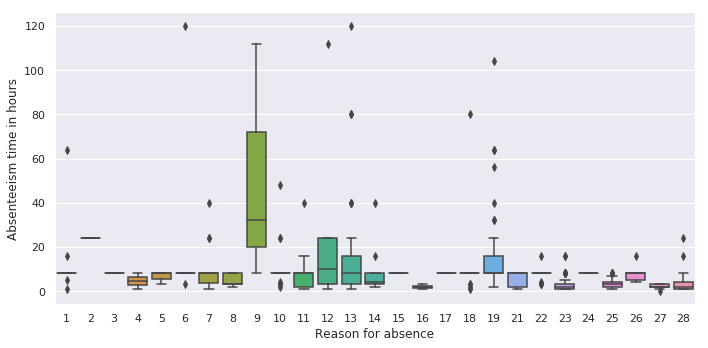

In [108]:
# Absence distribution per Reason for absence. Reason 9 had the hightest absence time. 
sns.catplot(x='Reason for absence',y='Absenteeism time in hours',kind='box',aspect=2,data=pandas_df)

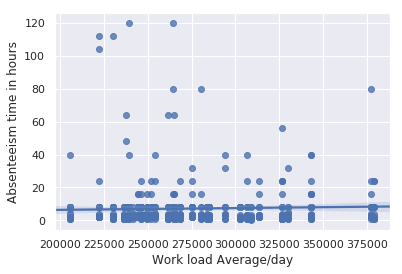

In [109]:
# Look at linear relationship between Work load Average/day and absence time. 
sns.regplot(x="Work load Average/day", y="Absenteeism time in hours", data=pandas_df)

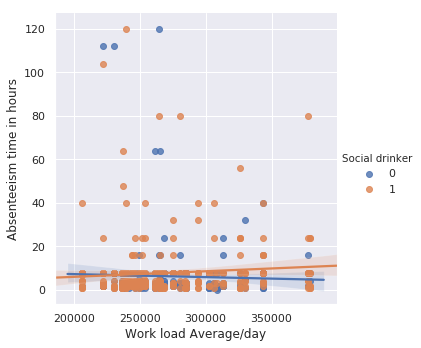

In [110]:
# Look at this linear relationship by condition on Social drinker.
sns.lmplot(x="Work load Average/day", y="Absenteeism time in hours", hue="Social drinker", data=pandas_df)

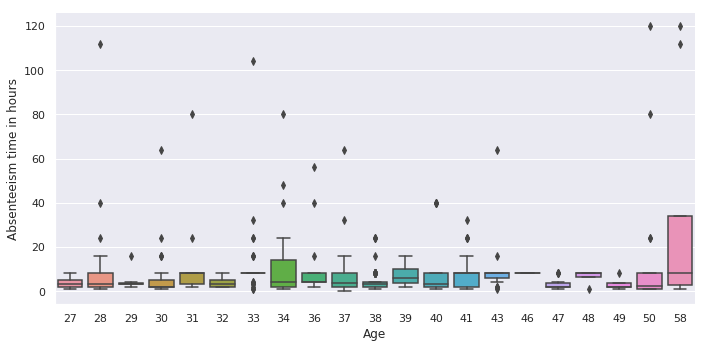

In [111]:
# look at relationship between age and absence.
sns.catplot(x='Age',y='Absenteeism time in hours',kind='box',aspect=2,data=pandas_df)

## Gradient-boosted Tree Regression

In [112]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Absenteeism time in hours', maxIter=10)

gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'Absenteeism time in hours', 'features').show(5)

+------------------+-------------------------+--------------------+
|        prediction|Absenteeism time in hours|            features|
+------------------+-------------------------+--------------------+
| 6.695614164898756|                        4|[1.0,2.0,26.0,118...|
| 9.739014892320787|                        8|[1.0,3.0,18.0,289...|
|11.392482091485551|                        8|[1.0,4.0,13.0,289...|
| 10.15185417840696|                       16|[1.0,5.0,12.0,179...|
| 7.955193031459713|                        8|[2.0,2.0,11.0,388...|
+------------------+-------------------------+--------------------+
only showing top 5 rows



In [113]:

gbt_evaluator = RegressionEvaluator(labelCol="Absenteeism time in hours", predictionCol="prediction", 
                                    metricName="rmse")

rmse = gbt_evaluator.evaluate(gbt_predictions)
print("RMSE on test data for Gradient-boosted tree regression = %g" % rmse)

gbt_evaluator = RegressionEvaluator(labelCol="Absenteeism time in hours", predictionCol="prediction", metricName="r2")
print("R2 on test data for Gradient-boosted tree regression = %g" % gbt_evaluator.evaluate(gbt_predictions))

RMSE on test data for Gradient-boosted tree regression = 9.50997
R2 on test data for Gradient-boosted tree regression = 0.536914


## GLM with Gaussian

In [114]:
from pyspark.ml.regression import GeneralizedLinearRegression

glr = GeneralizedLinearRegression(family="gaussian", link="identity", 
                                  featuresCol='features', labelCol='Absenteeism time in hours')

# Fit the model
glr_model = glr.fit(train_data)

# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(glr_model.coefficients))
print("Intercept: " + str(glr_model.intercept) + "\n")

# Summarize the model over the training set and print out some metrics
training_summary = glr_model.summary

print("Coefficient Standard Errors: " + str(training_summary.coefficientStandardErrors))
print("T Values: " + str(training_summary.tValues))
print("P Values: " + str(training_summary.pValues))
print("Dispersion: " + str(training_summary.dispersion))
print("Null Deviance: " + str(training_summary.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(training_summary.residualDegreeOfFreedomNull))
print("Deviance: " + str(training_summary.deviance))
print("Residual Degree Of Freedom: " + str(training_summary.residualDegreeOfFreedom))
print("AIC: " + str(training_summary.aic))

Coefficients: [-0.13236211178560536,-0.9276083685092196,-0.5292863402891661,0.002566792457652132,-0.05364904987629232,-0.07085712015404699,0.10535753506259153,-4.062449673205312e-06,-0.71947433333991,0.7086016472382726,3.2118365052396745,-0.27744969667152064,-0.18451854023070965]
Intercept: 25.124355415607134

Coefficient Standard Errors: [0.17016517409789902, 0.4060672108061694, 0.07867496311270146, 0.010829426952208706, 0.050300777277539094, 0.22620545778944134, 0.13128666049307292, 1.450044399044585e-05, 0.9451676932578174, 0.6004604285026586, 1.4747601574297389, 0.5329449294473018, 0.17546580538744827, 8.334417818165168]
T Values: [-0.7778448938644467, -2.2843715124588098, -6.727506685080567, 0.23702015526579864, -1.0665650270229192, -0.31324231009493536, 0.8024999239595292, -0.28016036446070247, -0.761213421144364, 1.1800971614487252, 2.1778704076447046, -0.5205973100433733, -1.0515925870757092, 3.014530344380826]
P Values: [0.4370290931153482, 0.022768757921435512, 4.744094006525

In [115]:
glr_model = glr.fit(train_data)
glr_predictions = glr_model.transform(test_data)
glr_predictions.select('prediction', 'Absenteeism time in hours', 'features').show(5)

+------------------+-------------------------+--------------------+
|        prediction|Absenteeism time in hours|            features|
+------------------+-------------------------+--------------------+
| 9.113257041650868|                        4|[1.0,2.0,26.0,118...|
|10.891023423646782|                        8|[1.0,3.0,18.0,289...|
|12.589782317647435|                        8|[1.0,4.0,13.0,289...|
| 8.652124666090266|                       16|[1.0,5.0,12.0,179...|
|15.626451475760682|                        8|[2.0,2.0,11.0,388...|
+------------------+-------------------------+--------------------+
only showing top 5 rows



In [116]:
glr_evaluator = RegressionEvaluator(labelCol="Absenteeism time in hours", predictionCol="prediction", metricName="rmse")
print("RMSE on test data for GLM Gaussian = %g" % glr_evaluator.evaluate(glr_predictions))

glr_evaluator = RegressionEvaluator(labelCol="Absenteeism time in hours", predictionCol="prediction", metricName="r2")
print("R2 on test data for GLM Gaussian = %g" % glr_evaluator.evaluate(glr_predictions))

RMSE on test data for GLM Gaussian = 13.2067
R2 on test data for GLM Gaussian = 0.106918


Actually, GLM with Gaussian is same as Linear Regression. So, RMSE and R2 for both are same. 

## Setting Up DataFrame - 2

In [117]:
from pyspark.ml.feature import OneHotEncoderEstimator,StringIndexer,VectorAssembler
 

# Select categorical columns.
categoricalColumns = ['Month of absence','Day of the week','Reason for absence', 'Education', 
                      'Son', 'Social drinker', 'Pet']
stages = []

# Index categorical columns
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

# Define label column.
label_stringIdx = StringIndexer(inputCol = 'Absenteeism time in hours', outputCol = 'label')
stages += [label_stringIdx]

# Left needed numeric columns.
numericCols = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 
               'Work load Average/day', 'Body mass index']

# Using vector assembler to turn all of these columns into one features column. 
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [118]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

# Select categorical columns.
categoricalColumns = ['Reason for absence', 'Education', 'Son', 'Social drinker', 'Pet']
stages = []

# Index categorical columns
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

# Define label column.
label_stringIdx = StringIndexer(inputCol = 'Absenteeism time in hours', outputCol = 'label')
stages += [label_stringIdx]

# Left needed numeric columns.
numericCols = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day', 'Body mass index']

# Using vector assembler to turn all of these columns into one features column. 
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [119]:
from pyspark.ml import Pipeline

# Go through all together. 
pipeline = Pipeline(stages = stages)

# Apply it to dataframe. 
pipelineModel = pipeline.fit(df_clean)

# Incoroprate results into a new dataframe.
df_pipe = pipelineModel.transform(df_clean)

selectedCols = ['label', 'features'] + cols
df_pipe = df_pipe.select(selectedCols)

df_pipe.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Month of absence: integer (nullable = true)
 |-- Day of the week: integer (nullable = true)
 |-- Reason for absence: integer (nullable = true)
 |-- Transportation expense: integer (nullable = true)
 |-- Distance from Residence to Work: integer (nullable = true)
 |-- Service time: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work load Average/day: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Son: integer (nullable = false)
 |-- Social drinker: integer (nullable = true)
 |-- Pet: integer (nullable = false)
 |-- Body mass index: integer (nullable = true)
 |-- Absenteeism time in hours: integer (nullable = true)



In [120]:
# Now have features column and label column
pd.DataFrame(df_pipe.take(5), columns=df_pipe.columns).transpose()

,0,1,2,3,4
label,4,1,4,1,4
features,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Month of absence,7,7,7,7,7
Day of the week,3,4,5,5,6
Reason for absence,26,23,7,23,23
Transportation expense,289,179,279,289,260
Distance from Residence to Work,36,51,5,36,50
Service time,13,18,14,13,11
Age,33,38,39,33,36
Work load Average/day,239554,239554,239554,239554,239554


In [121]:
# Randomly split data into train and test sets, and set seed for reproducibility.
train, test = df_pipe.randomSplit([0.8, 0.2], seed = 201810)

# Let's see our training data.
print("Training Dataset Count: " + str(train.count()))
train.show(5)

Training Dataset Count: 513
+-----+--------------------+----------------+---------------+------------------+----------------------+-------------------------------+------------+---+---------------------+---------+---+--------------+---+---------------+-------------------------+
|label|            features|Month of absence|Day of the week|Reason for absence|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day|Education|Son|Social drinker|Pet|Body mass index|Absenteeism time in hours|
+-----+--------------------+----------------+---------------+------------------+----------------------+-------------------------------+------------+---+---------------------+---------+---+--------------+---+---------------+-------------------------+
|  0.0|(45,[0,26,29,33,3...|              10|              4|                23|                   179|                             51|          18| 38|               253465|        1|  0|             1|  0|             31

In [122]:
# And our testing data.
print("Test Dataset Count: " + str(test.count()))
test.show(5)

Test Dataset Count: 121
+-----+--------------------+----------------+---------------+------------------+----------------------+-------------------------------+------------+---+---------------------+---------+---+--------------+---+---------------+-------------------------+
|label|            features|Month of absence|Day of the week|Reason for absence|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day|Education|Son|Social drinker|Pet|Body mass index|Absenteeism time in hours|
+-----+--------------------+----------------+---------------+------------------+----------------------+-------------------------------+------------+---+---------------------+---------+---+--------------+---+---------------+-------------------------+
|  0.0|(45,[0,26,31,33,3...|               3|              4|                23|                   289|                             36|          13| 33|               222196|        1|  2|             1|  1|             30|   

## Logistic Regression

In [123]:
from pyspark.ml.classification import LogisticRegression

logr = LogisticRegression(featuresCol = 'features', labelCol = 'label',family="multinomial",maxIter=10)

logrModel = logr.fit(train)
logrModel_predictions = logrModel.transform(test)
logrModel_predictions.select('Reason for absence', 'Age','label', 'rawPrediction', 
                             'prediction', 'probability').show(10)

+------------------+---+-----+--------------------+----------+--------------------+
|Reason for absence|Age|label|       rawPrediction|prediction|         probability|
+------------------+---+-----+--------------------+----------+--------------------+
|                23| 33|  0.0|[3.12942214939340...|       1.0|[0.13784818621585...|
|                28| 48|  0.0|[2.38270535586416...|       1.0|[0.04056555094989...|
|                13| 38|  0.0|[4.03688628099989...|       0.0|[0.32517622511342...|
|                13| 43|  0.0|[4.50121646300547...|       0.0|[0.46553061077250...|
|                19| 28|  0.0|[6.09607738020693...|       0.0|[0.86895158576437...|
|                19| 33|  0.0|[4.91493570332870...|       0.0|[0.63885395612736...|
|                19| 33|  0.0|[4.87947763749981...|       0.0|[0.61173713032568...|
|                19| 36|  0.0|[4.69100430739720...|       0.0|[0.50217041636128...|
|                22| 40|  0.0|[6.19919840895385...|       0.0|[0.86185182315

In [124]:
# Evaluate model. 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and get accuracy.
logrModel_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", 
                                                        metricName="accuracy")
logrModel_accuracy = logrModel_evaluator.evaluate(logrModel_predictions)
print("Accuracy = %g" % logrModel_accuracy)

Accuracy = 0.38843


## Decision Tree Classifier 

In [125]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 5)

dtModel = dt.fit(train)
dtModel_predictions = dtModel.transform(test)
dtModel_predictions.select('Reason for absence', 'Age', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+------------------+---+-----+--------------------+----------+--------------------+
|Reason for absence|Age|label|       rawPrediction|prediction|         probability|
+------------------+---+-----+--------------------+----------+--------------------+
|                23| 33|  0.0|[1.0,22.0,4.0,9.0...|       1.0|[0.025,0.55,0.1,0...|
|                28| 48|  0.0|[5.0,15.0,6.0,19....|       3.0|[0.09259259259259...|
|                13| 38|  0.0|[56.0,14.0,17.0,1...|       0.0|[0.46666666666666...|
|                13| 43|  0.0|[82.0,2.0,4.0,4.0...|       0.0|[0.66666666666666...|
|                19| 28|  0.0|[82.0,2.0,4.0,4.0...|       0.0|[0.66666666666666...|
|                19| 33|  0.0|[82.0,2.0,4.0,4.0...|       0.0|[0.66666666666666...|
|                19| 33|  0.0|[82.0,2.0,4.0,4.0...|       0.0|[0.66666666666666...|
|                19| 36|  0.0|[82.0,2.0,4.0,4.0...|       0.0|[0.66666666666666...|
|                22| 40|  0.0|[82.0,2.0,4.0,4.0...|       0.0|[0.66666666666

In [126]:
# Evaluate model. 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and get accuracy.
dtModel_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", 
                                                      metricName="accuracy")
dtModel_accuracy = dtModel_evaluator.evaluate(dtModel_predictions)
print("Accuracy = %g" % dtModel_accuracy )

Accuracy = 0.429752


## Random Forest Classifier

In [139]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees =30)

rfModel = rf.fit(train)
rfModel_predictions = rfModel.transform(test)
rfModel_predictions.select('Reason for absence', 'Age', 'label', 'rawPrediction', 'prediction', 
                           'probability').show(10)

+------------------+---+-----+--------------------+----------+--------------------+
|Reason for absence|Age|label|       rawPrediction|prediction|         probability|
+------------------+---+-----+--------------------+----------+--------------------+
|                23| 33|  0.0|[9.86008773821059...|       0.0|[0.32866959127368...|
|                28| 48|  0.0|[7.39249827664009...|       0.0|[0.24641660922133...|
|                13| 38|  0.0|[13.2083324597500...|       0.0|[0.44027774865833...|
|                13| 43|  0.0|[12.1416885908461...|       0.0|[0.40472295302820...|
|                19| 28|  0.0|[15.6646054050903...|       0.0|[0.52215351350301...|
|                19| 33|  0.0|[15.3848177456425...|       0.0|[0.51282725818808...|
|                19| 33|  0.0|[15.1701456699157...|       0.0|[0.50567152233052...|
|                19| 36|  0.0|[12.1990477587045...|       0.0|[0.40663492529015...|
|                22| 40|  0.0|[15.5622251261338...|       0.0|[0.51874083753

In [140]:
# Evaluate model. 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and get accuracy.
rfModel_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", 
                                                      metricName="accuracy")
rfModel_accuracy = rfModel_evaluator.evaluate(rfModel_predictions)
print("Accuracy = %g" % rfModel_accuracy)

Accuracy = 0.421488


In [64]:
 spark.stop()